In [5]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [6]:
data_path = "../data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [7]:
version = 2 # update version on each iteration
dataloader_path = "../dataloaders/pasta_shape_dataloader"

In [8]:
dls = torch.load(f"{dataloader_path}_v{version}.pkl")

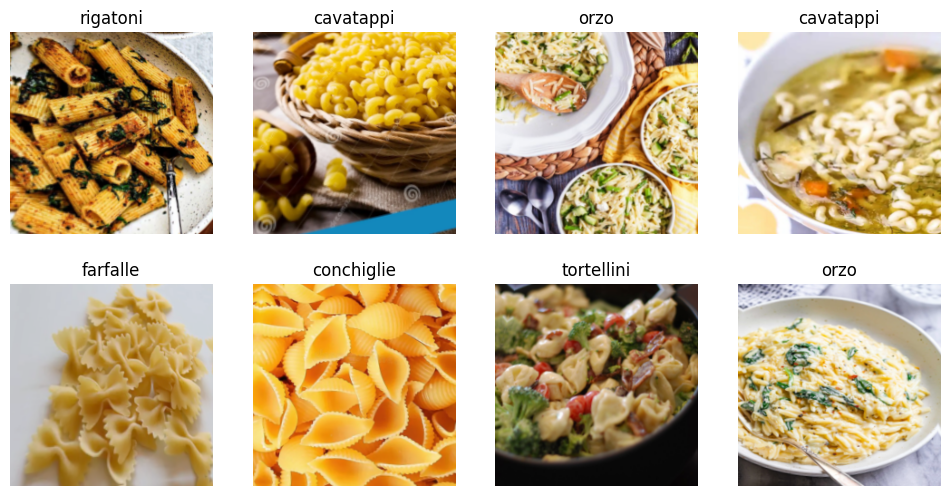

In [9]:
dls.train.show_batch(max_n=8, nrows=2)

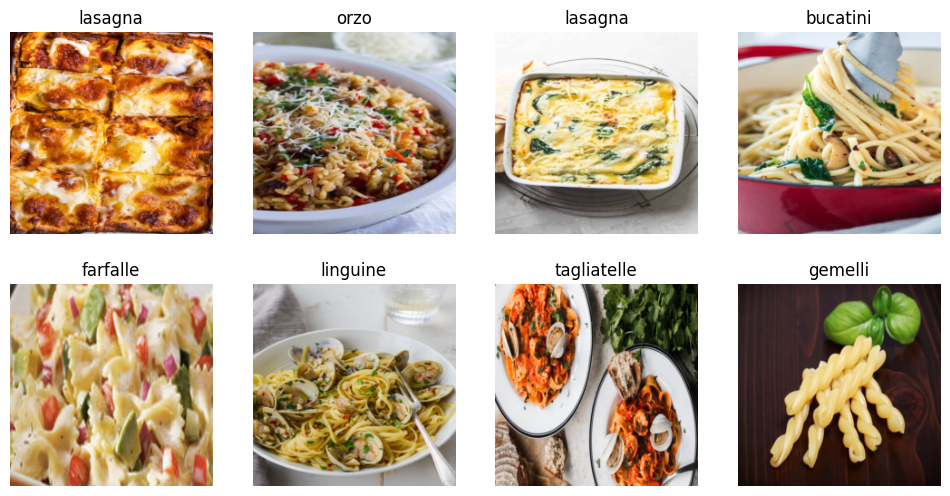

In [10]:
dls.valid.show_batch(max_n=8, nrows=2)

## ResNet50

In [11]:
model = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\zzami/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 61.0MB/s]


In [12]:
model.fine_tune(9)

e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


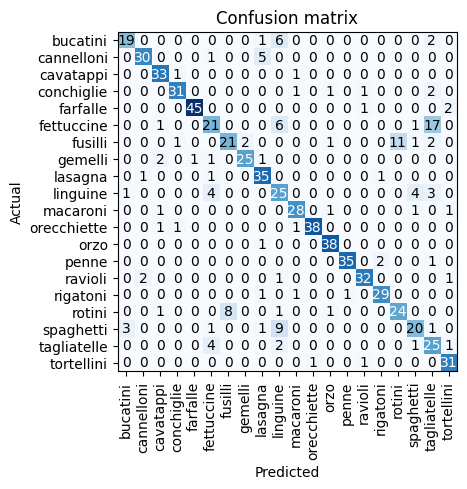

In [13]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

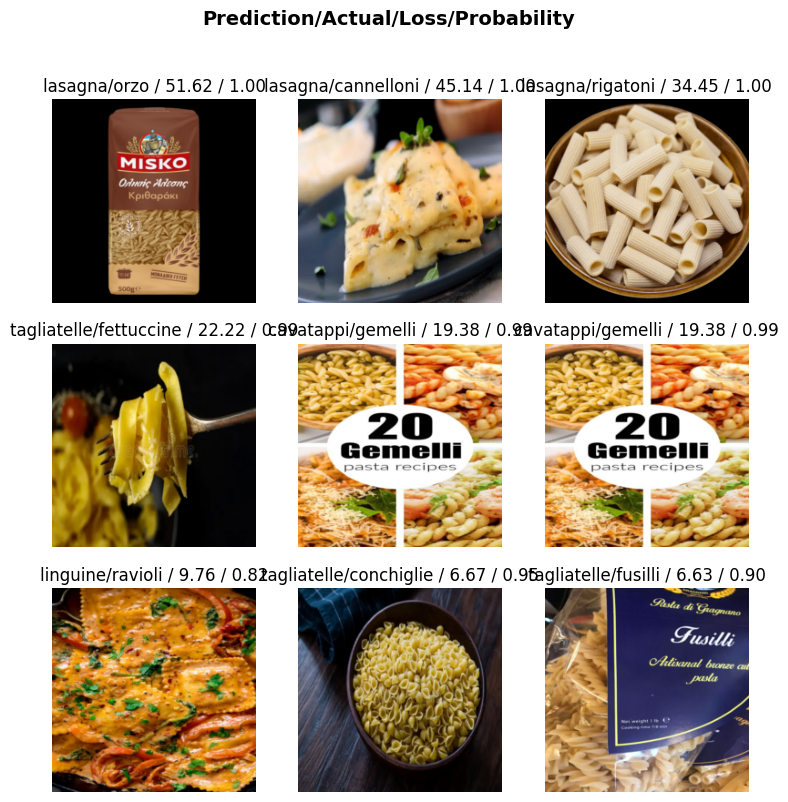

In [14]:
interp.plot_top_losses(9, nrows=3)

## EfficientNet-B0

In [15]:
model = vision_learner(dls, efficientnet_b0, metrics=[error_rate,accuracy])

e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\zzami/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:01<00:00, 19.2MB/s]


In [16]:
model.fine_tune(9)

e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


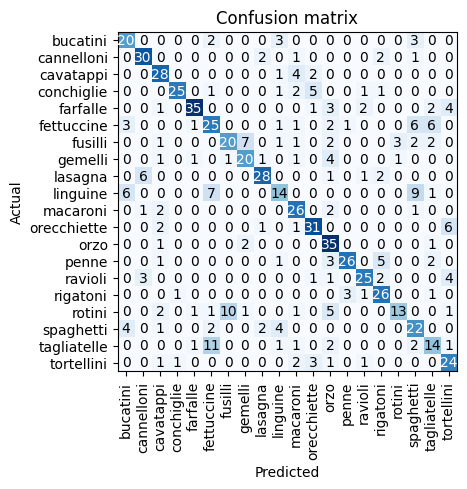

In [17]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

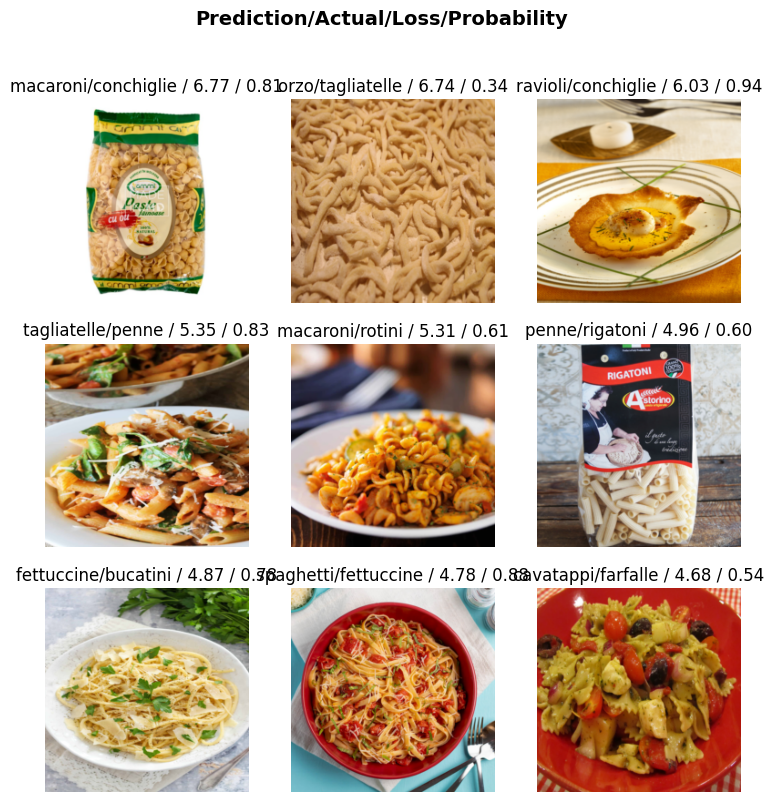

In [18]:
interp.plot_top_losses(9, nrows=3)

## MobileNetV3-Large

In [19]:
model = vision_learner(dls, mobilenet_v3_large, metrics=[error_rate,accuracy])

e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to C:\Users\zzami/.cache\torch\hub\checkpoints\mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:01<00:00, 14.5MB/s]


In [20]:
model.fine_tune(9)

e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


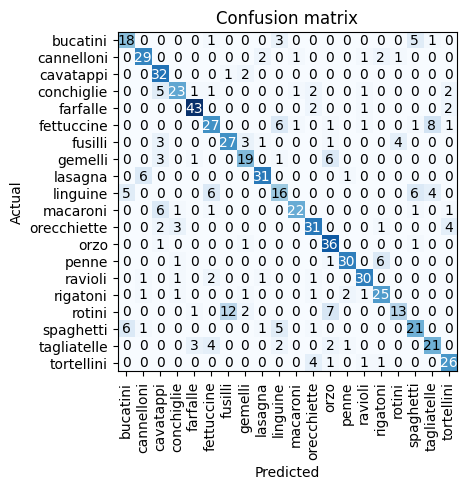

In [21]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

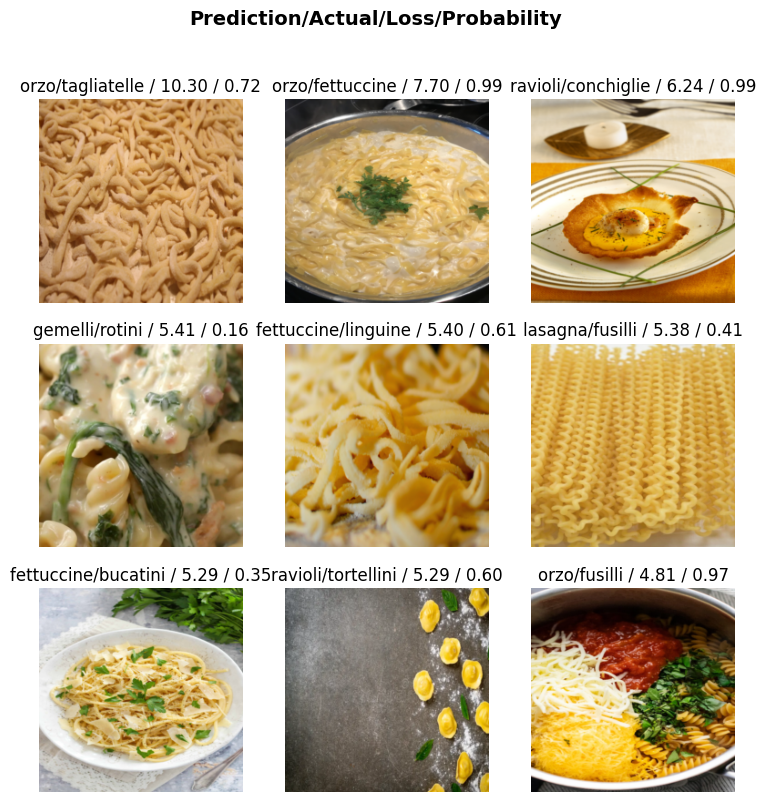

In [22]:
interp.plot_top_losses(9, nrows=3)